,Ім’я файлу,Колірна модель,Формат,Кількість каналів,Розмір файлу (МБ),Ширина,Висота,Повний шлях,Зменшене зображення
0,gettyimages-2182670980-612x612.jpg,RGB,JPEG,3,0.05,612,408,./data/gettyimages-2182670980-612x612.jpg,
1,gettyimages-1763677640-612x612.jpg,RGB,JPEG,3,0.05,612,408,./data/gettyimages-1763677640-612x612.jpg,
2,gettyimages-1801729029-612x612.jpg,RGB,JPEG,3,0.08,612,408,./data/gettyimages-1801729029-612x612.jpg,
3,gettyimages-2186579081-612x612.jpg,RGB,JPEG,3,0.04,612,408,./data/gettyimages-2186579081-612x612.jpg,
4,gettyimages-2173713629-612x612.jpg,RGB,JPEG,3,0.04,612,408,./data/gettyimages-2173713629-612x612.jpg,
5,gettyimages-1686638020-612x612.jpg,RGB,JPEG,3,0.03,612,408,./data/gettyimages-1686638020-612x612.jpg,
6,gettyimages-1801966266-612x612.jpg,RGB,JPEG,3,0.05,612,408,./data/gettyimages-1801966266-612x612.jpg,
7,gettyimages-1472079707-612x612.jpg,RGB,JPEG,3,0.04,612,408,./data/gettyimages-1472079707-612x612.jpg,
8,gettyimages-1724626408-612x612.jpg,RGB,JPEG,3,0.07,612,453,./data/gettyimages-1724626408-612x612.jpg,
9,gettyimages-2182473837-612x612.jpg,RGB,JPEG,3,0.05,612,357,./data/gettyimages-2182473837-612x612.jpg,

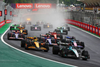
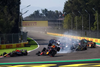
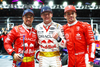
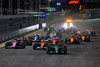
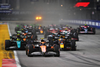
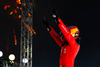
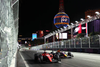
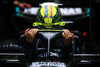
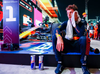
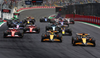
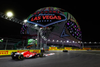
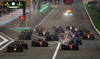
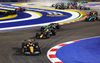
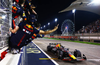
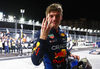

In [13]:
import os
import glob
import pandas as pd
from PIL import Image
import base64
from io import BytesIO

def image_to_base64(img):
    buffer = BytesIO()
    img.save(buffer, format='PNG')
    encoded_img = base64.b64encode(buffer.getvalue()).decode('utf-8')
    return encoded_img

def analyze_images(folder_path):
    image_data = []
    
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                img_format = img.format
                channels = len(img.getbands())
                file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                
                thumbnail = img.copy()
                thumbnail.thumbnail((100, 100), Image.LANCZOS)
                
                thumbnail_base64 = image_to_base64(thumbnail)
                thumbnail_html = f'<img src="data:image/png;base64,{thumbnail_base64}" style="width:100px;height:100px;">'
                
                image_data.append({
                    'Ім’я файлу': file_name,
                    'Колірна модель': color_model,
                    'Формат': img_format,
                    'Кількість каналів': channels,
                    'Розмір файлу (МБ)': file_size,
                    'Ширина': width,
                    'Висота': height,
                    'Повний шлях': file_path,
                    'Зменшене зображення': thumbnail_html
                })
        except Exception as e:
            continue
    
    df = pd.DataFrame(image_data)
    return df

folder_path = './data'
df = analyze_images(folder_path)

from IPython.core.display import HTML
HTML(df.to_html(escape=False))

In [ ]:
import os
import glob
import random
from PIL import Image, ImageOps

def apply_filter(img, filter_color):
    if filter_color == 'red':
        return ImageOps.colorize(ImageOps.grayscale(img), black="black", white="red")
    elif filter_color == 'green':
        return ImageOps.colorize(ImageOps.grayscale(img), black="black", white="green")
    elif filter_color == 'blue':
        return ImageOps.colorize(ImageOps.grayscale(img), black="black", white="blue")
    elif filter_color == 'yellow':
        return ImageOps.colorize(ImageOps.grayscale(img), black="black", white="yellow")
    elif filter_color == 'cyan':
        return ImageOps.colorize(ImageOps.grayscale(img), black="black", white="cyan")
    elif filter_color == 'magenta':
        return ImageOps.colorize(ImageOps.grayscale(img), black="black", white="magenta")
    else:
        return img

def create_poster(folder_path, output_file, rows, cols):
    images = [Image.open(file) for file in glob.glob(os.path.join(folder_path, '*')) if file.endswith(('png', 'jpg', 'jpeg'))]
    
    poster_images = []
    for img in images:
        width, height = img.size
        side = min(width, height)
        img_cropped = img.crop(((width - side) // 2, (height - side) // 2, (width + side) // 2, (height + side) // 2))
        img_resized = img_cropped.resize((500, 500))
        
        filter_color = random.choice(['red', 'green', 'blue', 'yellow', 'cyan', 'magenta'])
        img_filtered = apply_filter(img_resized, filter_color)
        
        poster_images.append(img_filtered)
    
    poster_width = cols * 500
    poster_height = rows * 500
    poster = Image.new('RGB', (poster_width, poster_height))
    
    for i in range(rows):
        for j in range(cols):
            img = random.choice(poster_images)
            poster.paste(img, (j * 500, i * 500))
    
    poster.save(output_file)

folder_path = './data' 
create_poster(folder_path, 'poster4.jpg', 4, 1)